In [160]:
# ![]()
# <img src='' width='400px' height='300px'>

- apple width = 7cm
- apple length = 7cm
- banana width = 3cm
- banana length = 10cm
- watermelon width = 25cm
- watermelon length = 25cm

- apple : 0
- banana : 1
- watermelon : 2

In [161]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [162]:
def generate_dataset(n):
    apple_width = np.random.normal(7, 2, n)
    apple_length = np.random.normal(7, 2, n)
    banana_width = np.random.normal(3, 1, n)
    banana_length = np.random.normal(10, 3.5, n)
    watermelon_width = np.random.normal(25, 5, n)
    watermelon_length = np.random.normal(25, 5, n)
    
    width = np.concatenate((apple_width, banana_width, watermelon_width))
    length = np.concatenate((apple_length, banana_length, watermelon_length))
    X = np.array([width, length]).T
    
    Y_apples = np.zeros(n, dtype='int')
    Y_bananas = np.ones(n, dtype='int')
    Y_watermelon = np.ones(n, dtype='int') * 2
    Y = np.concatenate((Y_apples, Y_bananas, Y_watermelon))
    
    return X, Y 

In [163]:
X_train, Y_train = generate_dataset(1000)

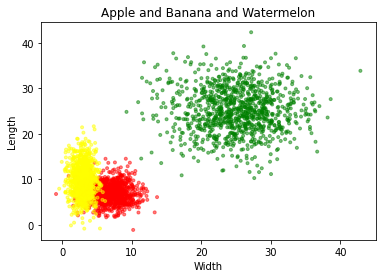

In [164]:
color_map = ['red', 'yellow', 'green']
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=Y_train,
    cmap=ListedColormap(color_map),
    marker='.',
    alpha=0.5
)

plt.title('Apple and Banana and Watermelon')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

#### KNN - K Nearest Neighbors

In [165]:
from knn import KNN

In [166]:
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [167]:
new_fruit1 = np.array([3, 8.4])
new_fruit2 = np.array([6, 6])
new_fruit3 = np.array([26, 21])

new_fruits = [new_fruit1, new_fruit2, new_fruit3]
outputs = knn.predict(new_fruits)

In [168]:
knn.show_fruit(outputs)

🍌
🍎
🍉


#### Test

In [169]:
number_of_test = 100
X_test, Y_test = generate_dataset(number_of_test)

In [170]:
knn.evaluate(X_test, Y_test)

0.9333333333333333

In [171]:
Y_pred = knn.predict(X_test)

In [173]:
# Confusion Matrix
def create_confusion_matrix(number_of_test, Y_test, Y_pred):
    confusion_matrix = np.zeros((3, 3))

    for i in range(3 * number_of_test):
        if Y_test[i] == 0 and Y_pred[i] == 0:
            confusion_matrix[0][0] += 1
        elif Y_test[i] == 0 and Y_pred[i] == 1:
            confusion_matrix[0][1] += 1
        elif Y_test[i] == 0 and Y_pred[i] == 2:
            confusion_matrix[0][2] += 1
            
        elif Y_test[i] == 1 and Y_pred[i] == 0:
            confusion_matrix[1][0] += 1
        elif Y_test[i] == 1 and Y_pred[i] == 1:
            confusion_matrix[1][1] += 1
        elif Y_test[i] == 1 and Y_pred[i] == 2:
            confusion_matrix[1][2] += 1
            
        elif Y_test[i] == 2 and Y_pred[i] == 0:
            confusion_matrix[2][0] += 1
        elif Y_test[i] == 2 and Y_pred[i] == 1:
            confusion_matrix[2][1] += 1
        elif Y_test[i] == 2 and Y_pred[i] == 2:
            confusion_matrix[2][2] += 1
            
    return confusion_matrix

In [174]:
confusion_matrix = create_confusion_matrix(number_of_test, Y_test, Y_pred)
confusion_matrix
    

array([[ 88.,  12.,   0.],
       [  8.,  92.,   0.],
       [  0.,   0., 100.]])

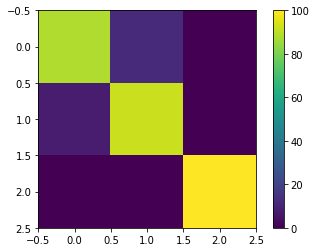

In [175]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

#### Scikit-Learn

In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

knn.predict(new_fruits)

array([1, 0, 2])

In [178]:
knn.score(X_test, Y_test)

0.9333333333333333